__Due__ Friday by 11:59pm   __Points__ 20   __Submitting__ a file upload

__Available__ Feb 19 at 12am - Feb 28 at 11:59pm 10 days

Please answer the following questions. Some will be multiple choice and some will be require you to access data and perform some basic analysis.  For questions where numerical or graphical output are required, submit your code and output results as a python notebook.  I should be able to easily run your code against the data to reproduce your results.

**1.** (2 point) Tatonement is:

a) a special form of continuous trading

b) an iterative series of auctions.

c) an example of a dealer market

In [ ]:
'b) an iterative series of auctions.'

**2.** (2 point) The largest components of transaction costs are:

a) Commissions, Fees and Taxes

b)  Spreads and Price Appreciation

c) Market Impact, Timing Risk and Opportunity Cost

In [ ]:
'c) Market Impact, Timing Risk and Opportunity Cost'

**3.** (6 points) Given the following order book, and new orders, show the order state of the order book and any trades that are generated after each order arrives. If a trade does not occur note "no trade".  _The starting point for each question is the cumulative order book from the previous question._

| Bid Quantity |	Bid Price |	Ask Price |	Ask Quantity |
|--------------|--------------|-----------|--------------|
|2000	       |22.20	      |22.21	  |1200	         |
|1800	       |22.19	      |22.25	  |2300	         |
|1000	       |22.16	      |22.26	  |1000	         |
|1200	       |22.15	      |22.30	  |2000	         |

a) A new order arrives to Buy 1000 shares at $22.20.  

b) A new order arrives to Sell 1200 shares at $22.19. 

c) A new order arrives to Buy 2200 shares at $22.24. 

d) A new order arrives to Sell 2000 shares at $22.19.  

e) A market order order arrives to buy 3000 shares.

**Solution:**

- **Trade:** None.

| Bid Quantity |	Bid Price |	Ask Price |	Ask Quantity |
|--------------|--------------|-----------|--------------|
|**3000**      |22.20	      |22.21	  |1200	         |
|1800	       |22.19	      |22.25	  |2300	         |
|1000	       |22.16	      |22.26	  |1000	         |
|1200	       |22.15	      |22.30	  |2000	         |

- **Trade:** Sell 1200 shares at $22.20.

| Bid Quantity |	Bid Price |	Ask Price |	Ask Quantity |
|--------------|--------------|-----------|--------------|
|**1800**      |22.20	      |22.21	  |1200	         |
|1800	       |22.19	      |22.25	  |2300	         |
|1000	       |22.16	      |22.26	  |1000	         |
|1200	       |22.15	      |22.30	  |2000	         |

- **Trade:** Buy 1200 shares at $22.21.

| Bid Quantity |	Bid Price |	Ask Price |	Ask Quantity |
|--------------|--------------|-----------|--------------|
|**1000**      |22.24	      |22.25	  |2300          |
|1800          |22.20	      |22.26	  |1000	         |
|1800	       |22.19	      |22.30	  |2000	         |
|1000	       |22.16	      |
|1200	       |22.15	      |

- **Trade:** Sell 1000 shares at \\$22.24. Sell 1000 shares at \\$22.20.

| Bid Quantity |	Bid Price |	Ask Price |	Ask Quantity |
|--------------|--------------|-----------|--------------|
|**800**       |22.20	      |22.25	  |2300          |
|1800          |22.19	      |22.26	  |1000	         |
|1000	       |22.16	      |22.30	  |2000	         |
|1200	       |22.15	      |

- **Trade:** Buy 2300 shares at \\$22.25. Buy 700 shares at \\$22.26

| Bid Quantity |	Bid Price |	Ask Price |	Ask Quantity |
|--------------|--------------|-----------|--------------|
|800           |22.20	      |22.26	  |**300**       |
|1800	       |22.19	      |22.30	  |2000	         |
|1000	       |22.16	      |
|1200	       |22.15	      |


**4.** (4 points) Using `atvi.csv` from the data directory, load the data using pandas and selecting the data for September 27, 2019 __only__:

- calculate the difference between the Open and Close prices in each interval
- calculate the return between each Open and the previous Open. Hint: use the pandas pct_change() function.
- create a chart with four rows of plots:  stock price,  close - open, % change, volume per interval (as bar).

In [6]:
%matplotlib inline

import datetime
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

matplotlib.rcParams[ 'figure.figsize' ] = ( 20, 20 )

trades = pd.read_csv('data/atvi.csv', infer_datetime_format=True)
timestamps = trades['timestamp'].astype(str)
times = pd.to_datetime( timestamps, format = '%Y-%m-%d %H:%M:%S' )
trades.index = times
trades = trades.drop(columns=['timestamp'])
data = pd.DataFrame(trades['2019-09-27'])

# calculate the difference between the Open and Close prices
data['close - open'] = data['close'] - data['open']

# calculate the return between each Open and the previous Open
data['% change'] = data['open'].pct_change()

data.head()

,open,high,low,close,volume,close - open,% change
timestamp,,,,,,,
2019-09-27 09:31:00,54.2100,54.5000,54.210,54.4800,69539,0.270,NaN
2019-09-27 09:32:00,54.5000,54.5500,54.440,54.4800,10478,-0.020,0.005350
2019-09-27 09:33:00,54.3909,54.5272,54.327,54.4209,13645,0.030,-0.002002
2019-09-27 09:34:00,54.4100,54.4500,54.370,54.4250,9405,0.015,0.000351
2019-09-27 09:35:00,54.4250,54.5000,54.370,54.4000,19844,-0.025,0.000276


Text(0.5, 1.0, 'volume per interval')

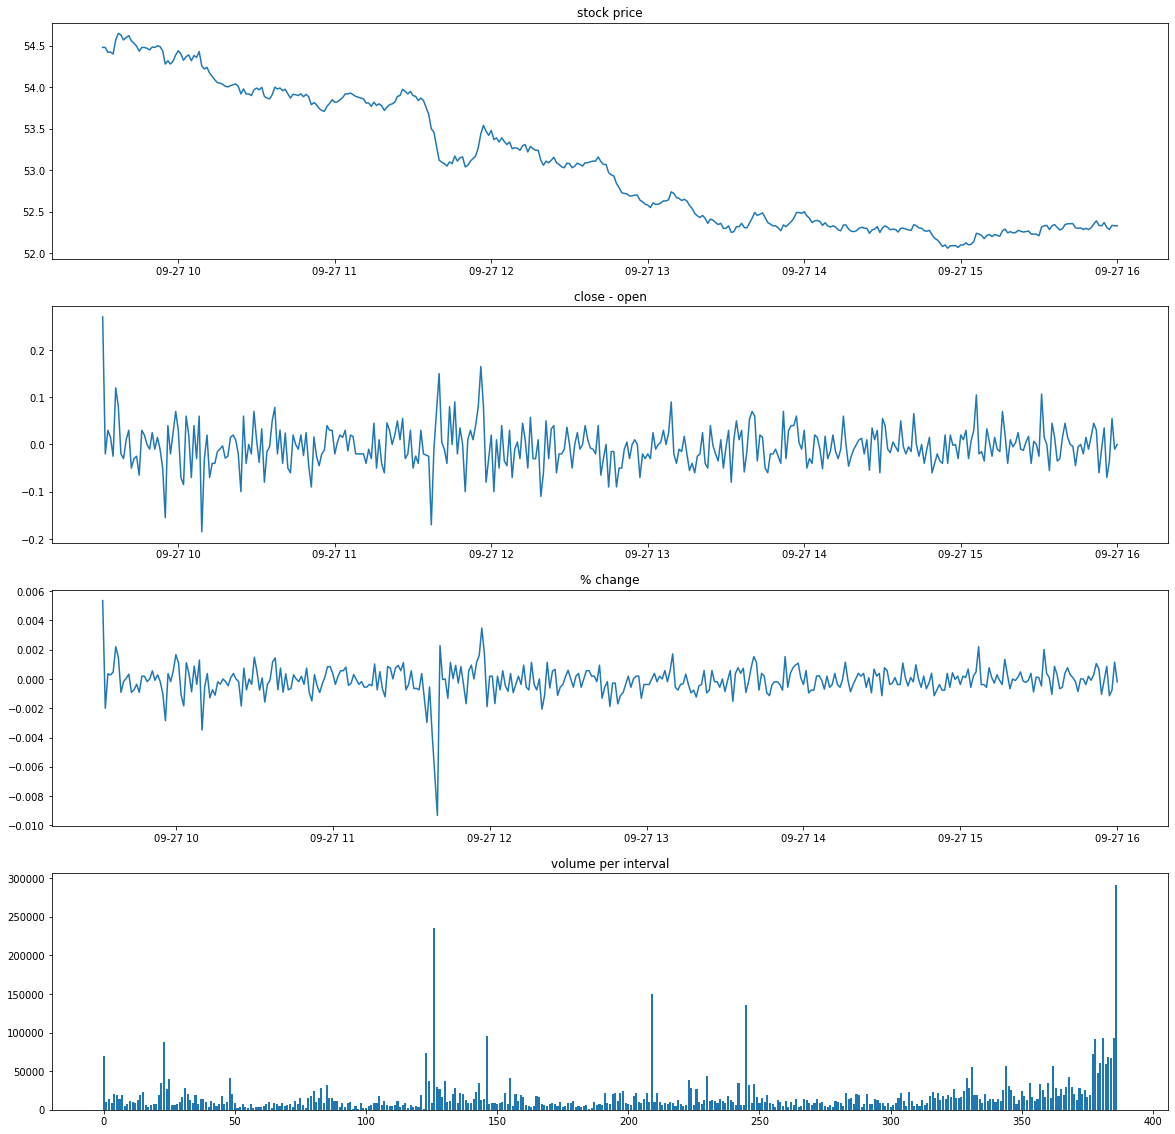

In [7]:
# create a chart with four rows of plots
fig, axes = plt.subplots(4, 1)
ax1, ax2, ax3, ax4 = axes.ravel()

ax1.plot(data['close'])
ax1.set_title("stock price")

ax2.plot(data['close - open'])
ax2.set_title("close - open")

ax3.plot(data['% change'])
ax3.set_title("% change")

xes = np.arange(len(data['volume']))
plt.bar(xes, data['volume'])
ax4.set_title("volume per interval")

**5.** (6 points) Using `atvi.csv` from the data directory, load the data using pandas:
- using the example code from the class or your own method fit a function to obtain coefficients for a VWAP target function. Show your resulting coefficients. 
- run the VWAP target function and plot your resulting cumulative volume function / target curve.
- plot the same VWAP target function as in b) above but also plot the "close" series from September 27, 2019 on the same chart.

In [8]:
from sklearn import linear_model as linear_model

# add a minute bin
# US start of date, calc in minutes
start_of_day = (9 * 60) + 30
# get the time for each bin in minutes and subtract 9:30
bar_data = data.copy()
bar_data[ 'minute_bars' ] = (bar_data.index.hour * 60) + bar_data.index.minute - start_of_day
# calculate the cumulative pct by day
totl_volume = bar_data.groupby( [ bar_data.index.date ] ).tail( 1 )[ 'volume' ] 
bar_data[ 'accum_volume' ] = bar_data.groupby( [ bar_data.index.date ] ).cumsum()[ 'volume' ] 
# transform的计算结果和原始数据的形状保持一致, iloc[-1]表示df最后一列
bar_data[ 'accum_pct' ] = bar_data.groupby( [ bar_data.index.date ]\
                                                  )[ 'accum_volume' ].transform( lambda x: x / x.iloc[ -1 ] )
# arrange our data
minute_bars = bar_data[ 'minute_bars' ]
X = pd.DataFrame( { 'bin': minute_bars, 
                    'bin2' : minute_bars**2, 
                    'bin3' : minute_bars**3, 
                    'bin4' : minute_bars**4, 
                    'bin5' : minute_bars**5 } )
y = bar_data[ 'accum_pct' ]
# now do the regression with no intercept
lm = linear_model.LinearRegression( fit_intercept = False )
model = lm.fit( X, y )
predictions = lm.predict( X )
# coefficients
lm.coef_

array([ 3.28418032e-03, -3.21752248e-05,  2.66542815e-07, -8.70812495e-10,
        9.85726969e-13])

Text(0.5, 1.0, 'Linear Regression Fit')

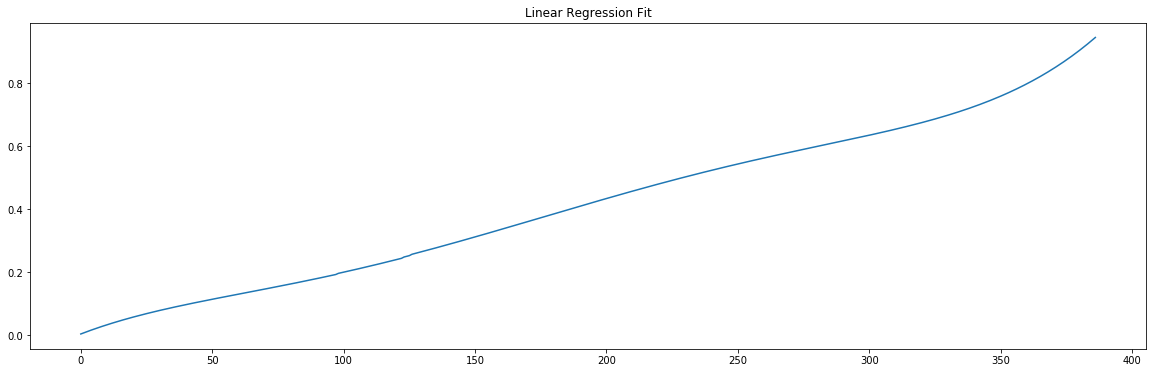

In [9]:
matplotlib.rcParams[ 'figure.figsize' ] = ( 20, 6 )
# use coefs to make our target series
def vwap_target( bar_num, coefs ):
    return ( coefs[ 0 ] * bar_num + 
             coefs[ 1 ] * bar_num**2 + 
             coefs[ 2 ] * bar_num**3 +
             coefs[ 3 ] * bar_num**4 +
             coefs[ 4 ] * bar_num**5 )
bins = bar_data['minute_bars'].unique()
target_pct_regr = vwap_target( bins, lm.coef_ )
plt.plot(target_pct_regr)
plt.title('Linear Regression Fit')

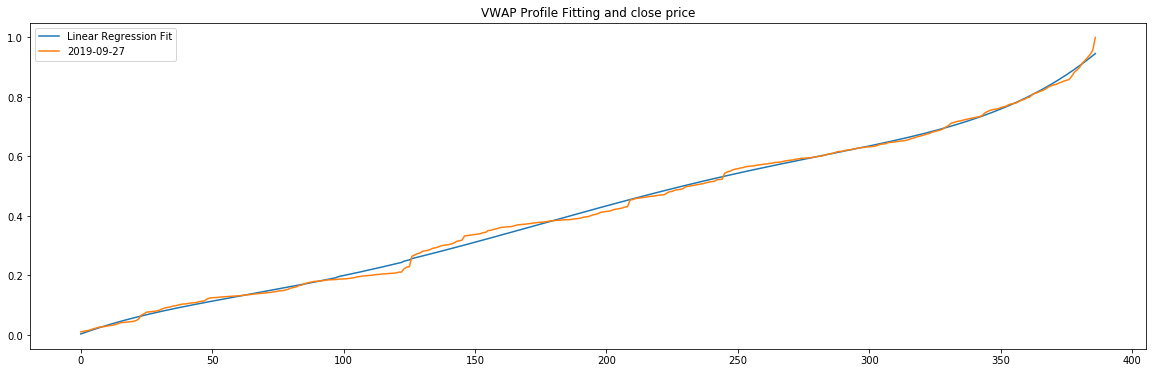

In [10]:
one_day = bar_data[ 'accum_pct' ].reset_index( drop = True )

regr_plot = plt.plot( target_pct_regr, label = 'Linear Regression Fit' )
one_day_plot = plt.plot( one_day, label = '2019-09-27' )

plt.title( 'VWAP Profile Fitting and close price' )
plt.legend()